In [291]:
# Created by MF Alfafa
# email : miftahf77@gmail.com
# web : mfalfafa.github.io 

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.lines as lines
from matplotlib.ticker import EngFormatter
from matplotlib.widgets import TextBox
import re
import numpy as np

In [210]:
def get_univ_town():
    df=pd.read_table('university_towns.txt', header=None)
    df_univ_town=pd.DataFrame(columns=['State', 'RegionName'])
    col=''
    for i, row in df.iterrows():
        if 'edit' in row[0]:
            col=row[0]
        else:
            if ':' not in row[0]:
                # Cleaning for state name
                col=re.sub("\[.*", "", col)
                col=re.sub("\ ", "", col)
                col=re.sub("\n", "", col)
                # Delete start and end with space char in str
                col=re.sub("\ $", '', col)
                if ' ' in col[0]: col=col[1:]
                # Cleaning for RegionName
                row[0]=re.sub("\ \(.*", "", row[0])
                row[0]=re.sub("\n", "", row[0])
                # Delete start and end with space char in str
                row[0]=re.sub("\ $", '', row[0])
                if ' ' in row[0][0]: row[0]=row[0][1:]
                df_univ_town=df_univ_town.append({'State':col, 'RegionName':row[0]}, ignore_index=True)
    return df_univ_town
# get_univ_town().head()

In [211]:
def convert_housing_data_to_quarters():
    states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico', 'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa', 'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 'ND': 'North Dakota', 'VA': 'Virginia'}
    df=pd.read_csv('City_Zhvi_AllHomes.csv')
    df=df.fillna(0)
#     print(df.head())
    date_list=list(df.columns[6:])
    df['State']=df['State'].map(states)
    quarter_list=[]
    m=0
    n=3
    #start of quarter
    q=2
    for i in range(int(len(date_list)/3)):
        current_quarter=date_list[i+m][0:date_list[i+m].index('-')]+'q'+ str(q)
        current_3_dates=date_list[i+m:i+n]
        quarter_list.append({current_quarter:current_3_dates})
        m+=2
        n+=2
        if q==4:
            q=1
        else:
            q+=1
    current_quarter=date_list[i+m][0:date_list[i+1+m].index('-')]+'q'+ str(q)
    quarter_list.append({current_quarter:date_list[(i+1)+m:]})
    # quarter_list
    df2=pd.DataFrame({'State':df['State'], 'RegionName':df['RegionName']})
    for item in quarter_list:
        col=list(item.keys())[0]
        val=list(item.values())[0]
        df2[col]=df[val].mean(axis=1)
    df2.set_index(['State', 'RegionName'], inplace=True)
    df2=df2.drop(columns='2016q3')
    return df2

In [212]:
def get_gdp_data():
    df=pd.read_excel('gdplev.xls', skiprows=7).drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 7'], axis=1).rename(columns={'Unnamed: 4': 'Quarter', 
                                                                                                                                                    'Unnamed: 5': 'GDP in billions of current dollars',
                                                                                                                                                    'Unnamed: 6': 'GDP in billions of chained 2009 dollars'})
    gdp=df.iloc[197:]
    return gdp

In [213]:
def get_recession_start():
    df=get_gdp_data()
    df=df.reset_index(drop=True)
    df2=df[['GDP in billions of chained 2009 dollars']].reset_index(drop=True)
    lst_start = []
    lst_end = []
    recession = False
    for i in range(1, len(df2)-1):
        if not recession and (df2.iloc[i-1, 0] > df2.iloc[i, 0] > df2.iloc[i+1, 0]):
            recession = True
            lst_start.append(df2.index[i])
        elif recession and (df2.iloc[i-1, 0] < df2.iloc[i, 0] < df2.iloc[i+1, 0]):
            recession = False
            lst_end.append(df2.index[i])   
    rec_start=list(df.iloc[lst_start]['Quarter'])[0]
    val=list(df[df['Quarter']==rec_start.encode('utf-8')]['GDP in billions of chained 2009 dollars'])[0]
    return [rec_start.encode('utf-8'), val]
# get_recession_start()

In [214]:
def get_recession_end():
    df=get_gdp_data()
    df=df.reset_index(drop=True)
    df2=df[['GDP in billions of chained 2009 dollars']].reset_index(drop=True)
    lst_start = []
    lst_end = []
    recession = False
    for i in range(1, len(df2)-1):
        if not recession and (df2.iloc[i-1, 0] > df2.iloc[i, 0] > df2.iloc[i+1, 0]):
            recession = True
            lst_start.append(df2.index[i])
        elif recession and (df2.iloc[i-1, 0] < df2.iloc[i, 0] < df2.iloc[i+1, 0]):
            recession = False
            lst_end.append(df2.index[i])
    rec_end=(df.iloc[lst_end[0]+1]['Quarter'])
    # Recession End value
    val=list(df[df['Quarter']==rec_end.encode('utf-8')]['GDP in billions of chained 2009 dollars'])[0]
    return [rec_end.encode('utf-8'), val]
# get_recession_end()

In [215]:
def get_recession_bottom():
    df=get_gdp_data()
    df=df.reset_index(drop=True)
    df2=df[['GDP in billions of chained 2009 dollars']].reset_index(drop=True)
    lst_start = []
    lst_end = []
    recession = False
    # for finding recession bottom
    n=0
    count=False
    for i in range(1, len(df2)-1):
        if(count==True):
            n+=1
        if not recession and (df2.iloc[i-1, 0] > df2.iloc[i, 0] > df2.iloc[i+1, 0]):
            recession = True
            lst_start.append(df2.index[i])
            count=True
        elif recession and (df2.iloc[i-1, 0] < df2.iloc[i, 0] < df2.iloc[i+1, 0]):
            recession = False
            lst_end.append(df2.index[i])
            count=False
    rec_bottom=df.iloc[lst_start[0]+(n-1)]['Quarter'] # n-1, means before recession end
    # Recession End value
    val=list(df[df['Quarter']==rec_bottom.encode('utf-8')]['GDP in billions of chained 2009 dollars'])[0]
    
    return [rec_bottom.encode('utf-8'), val]
# get_recession_bottom()

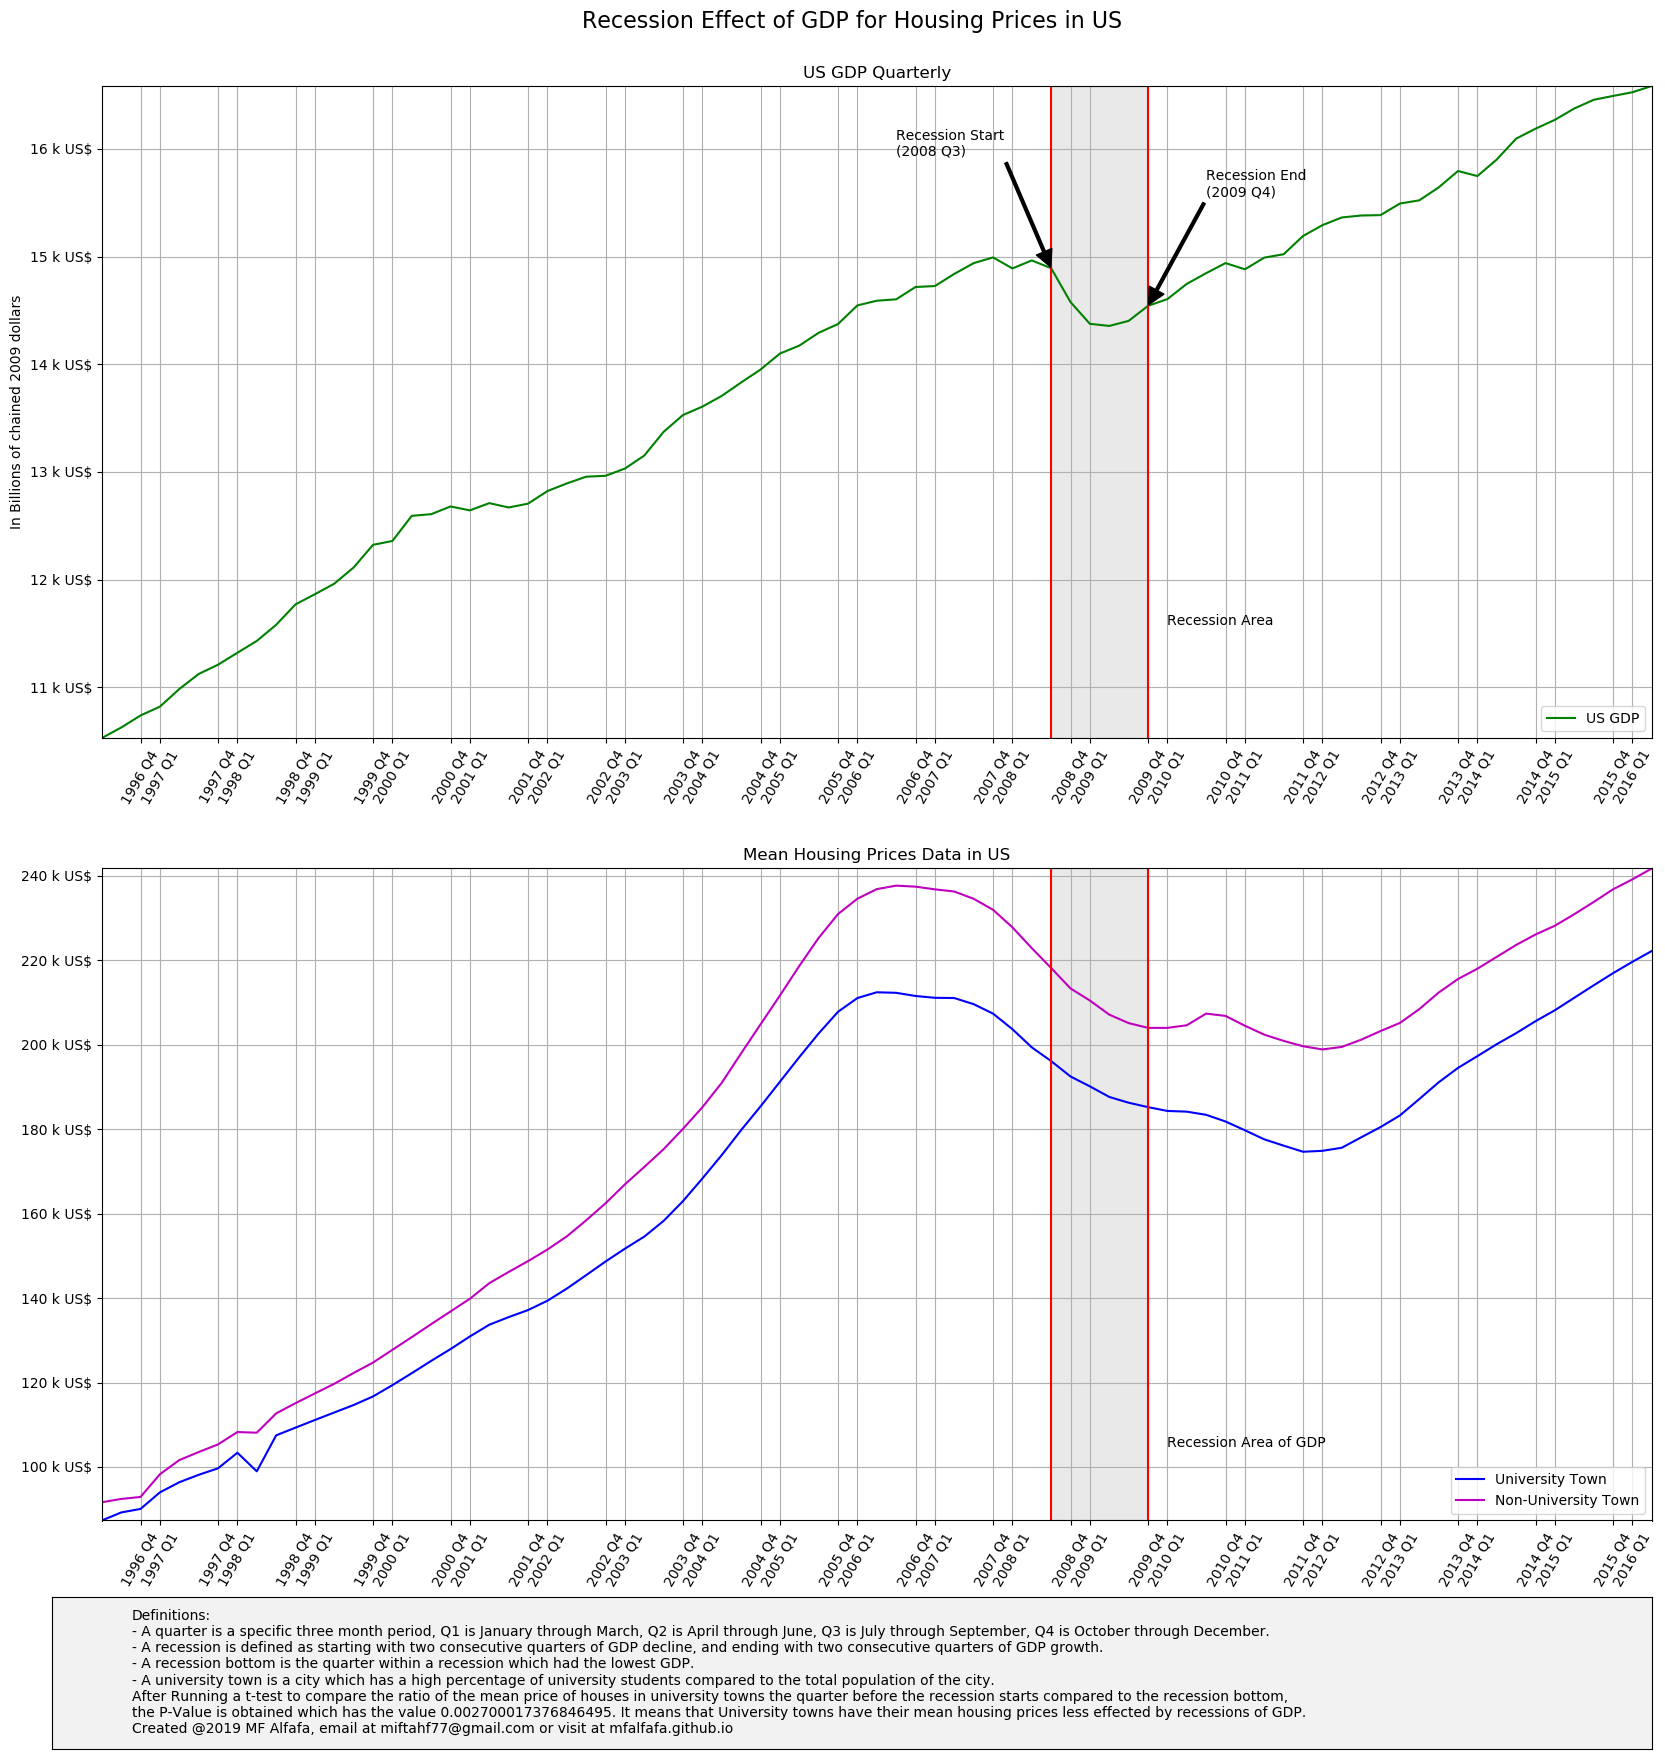

In [303]:
df=get_gdp_data()
gdp=list(df['GDP in billions of chained 2009 dollars'])
quarter_label=list(df['Quarter'])
x_locator=FixedLocator([quarter_label.index(i) for i in quarter_label if 'q1' in i or 'q4' in i])
x_formatter=[i for i in quarter_label if 'q1' in i or 'q4' in i]
x_formatter=FixedFormatter([re.sub('\q.*', ' Q'+i[len(i)-1], i) for i in x_formatter])
quarter_label=[i if 'q1' in i or 'q4' in i else '' for i in quarter_label]

fig=plt.figure(num=None, figsize=(20, 19), dpi=100, facecolor='w', edgecolor='r')
ax1=plt.subplot(2, 1, 1)
plt.plot(range(len(quarter_label)), gdp, '-g')
    
# Change tick of xlabel
quarter_label=[re.sub('\q.*', ' Q'+i[len(i)-1], i) if 'q1' in i or 'q4' in i else '' for i in quarter_label]
plt.xticks(range(len(quarter_label)), '', rotation=45)

# set xlabel
ax=plt.gca()
ax.set_xticklabels(quarter_label)

# # Rotate the x labels
x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(60)

ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)

rec_start=get_recession_start()
rec_end=get_recession_end()
rec_buttom=get_recession_bottom()

# Add two lines for sign of rec start and end
rec_start_x=list(df['Quarter']).index(rec_start[0])
line = lines.Line2D([rec_start_x,rec_start_x], [min(gdp),max(gdp)], picker=5, color='red')
ax.add_line(line)

rec_end_x=list(df['Quarter']).index(rec_end[0])
line = lines.Line2D([rec_end_x,rec_end_x], [min(gdp),max(gdp)], picker=5, color='red')
ax.add_line(line)

ax.axvspan(rec_start_x, rec_end_x, alpha=0.25, color='#aaaaaa')

ax.annotate('Recession Start\n({})'.format(re.sub('\q.*',' Q'+rec_start[0][len(rec_start[0])-1], rec_start[0])), xy=(rec_start_x, float(rec_start[1])), xytext=(rec_start_x-8, float(rec_start[1])*1.07),
           arrowprops=dict(facecolor='black', shrink=0.01, width=2),)
ax.annotate('Recession End\n({})'.format(re.sub('\q.*',' Q'+rec_end[0][len(rec_end[0])-1], rec_end[0])), xy=(rec_end_x, float(rec_end[1])), xytext=(rec_end_x+3, float(rec_end[1])*1.07),
           arrowprops=dict(facecolor='black', shrink=0.01, width=2),)
ax.annotate('Recession Area', xy=(rec_end_x, min(gdp)*1.1), xytext=(rec_end_x+1, min(gdp)*1.1))

plt.gca().yaxis.set_major_formatter(EngFormatter(unit=u" US$"))

plt.margins(0,0.0)
plt.grid(True, axis='both')
plt.title('US GDP Quarterly');
plt.ylabel('In Billions of chained 2009 dollars')
plt.legend(['US GDP'], loc=4)

# plt.xlim(-1, width)
plt.ylim(min(gdp), max(gdp));

### for univ town ####
# Get univ town and non univ town
univ_town_lst=get_univ_town()
df2=convert_housing_data_to_quarters()
univ_town=df2.loc[df2.index.isin(univ_town_lst.set_index(['State', 'RegionName']).index)]
non_univ_town=df2.loc[~df2.index.isin(univ_town_lst.set_index(['State', 'RegionName']).index)]
# Find mean of price every quarter
univ_town=list(univ_town.mean())
non_univ_town=list(non_univ_town.mean())

ax2=plt.subplot(2, 1, 2, sharex = ax1)
plt.plot(range(len(univ_town)), univ_town, '-b')
plt.plot(range(len(non_univ_town)), non_univ_town, '-m')

# Change tick of xlabel
quarter_label=[re.sub('\q.*', ' Q'+i[len(i)-1], i) if 'q1' in i or 'q4' in i else '' for i in quarter_label]
plt.xticks(range(len(quarter_label)), '', rotation=45)

# set xlabel
ax2=plt.gca()
ax2.set_xticklabels(quarter_label)

# # Rotate the x labels
x=plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(60)

ax2.xaxis.set_major_formatter(x_formatter)
ax2.xaxis.set_major_locator(x_locator)

min_y_lim=float(min(non_univ_town)) if min(univ_town)>min(non_univ_town) else float(min(univ_town))
max_y_lim=float(max(univ_town)) if max(univ_town)>max(non_univ_town) else float(max(non_univ_town))
# Add 2 lines
rec_start_x=list(df['Quarter']).index(rec_start[0])
line = lines.Line2D([rec_start_x,rec_start_x], [min_y_lim, max_y_lim], picker=5, color='red')
ax2.add_line(line)

rec_end_x=list(df['Quarter']).index(rec_end[0])
line = lines.Line2D([rec_end_x,rec_end_x], [min_y_lim, max_y_lim], picker=5, color='red')
ax2.add_line(line)

ax2.annotate('Recession Area of GDP', xy=(rec_end_x, min_y_lim*1.2), xytext=(rec_end_x+1, min_y_lim*1.2))

ax2.axvspan(rec_start_x, rec_end_x, alpha=0.25, color='#aaaaaa')

plt.gca().yaxis.set_major_formatter(EngFormatter(unit=u" US$"))

plt.margins(0,0.0)
plt.title('Mean Housing Prices Data in US');
plt.grid(True, axis='both')
plt.legend(['University Town', 'Non-University Town'], loc=4)
plt.ylim(min_y_lim, max_y_lim);


fig.suptitle('Recession Effect of GDP for Housing Prices in US', size=16, y=0.92);

axbox = plt.axes([0.1, 0.005, 0.8, 0.08])
text_box = TextBox(axbox, '', initial=
                   "Definitions:\n- A quarter is a specific three month period, Q1 is January through March, Q2 is April through June, Q3 is July through September, Q4 is October through December."+
                   "\n- A recession is defined as starting with two consecutive quarters of GDP decline, and ending with two consecutive quarters of GDP growth."+
                   "\n- A recession bottom is the quarter within a recession which had the lowest GDP."+ 
                   "\n- A university town is a city which has a high percentage of university students compared to the total population of the city."+
                   "\nAfter Running a t-test to compare the ratio of the mean price of houses in university towns the quarter before the recession starts compared to the recession bottom,"+
                   "\nthe P-Value is obtained which has the value 0.002700017376846495."+
                   " It means that University towns have their mean housing prices less effected by recessions of GDP."+
                   "\nCreated @2019 MF Alfafa, email at miftahf77@gmail.com or visit at mfalfafa.github.io")

plt.savefig('data_visualization_assignment4.png')